## **6. 비모수 검정**

- 모집단의 분포에 대한 가정을 하지 않고, 분포 형태의 동일 여부에 대한 검증
  * H0: 각 변수의 데이터 분포 차이가 없다  /  H1: 적어도 한 쌍은 분포 차이가 있다.
- 정규분포가 아닌 경우, 표본의 크기가 작은 경우, 서열 or 명목 척도인 경우에 사용
			
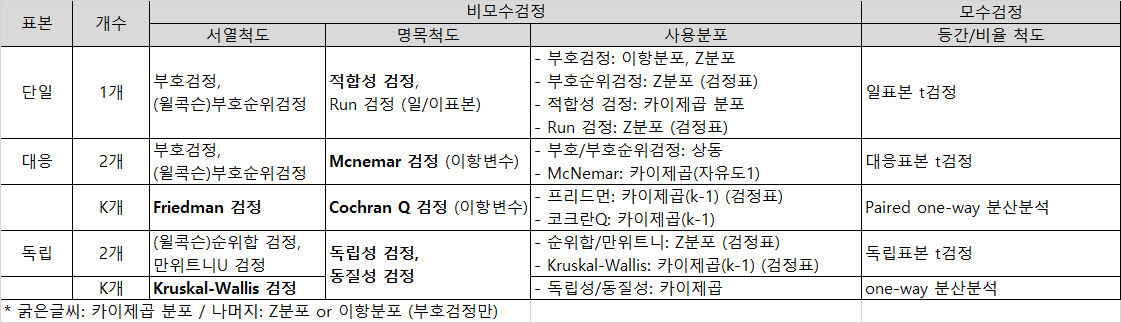

### **6-1. 카이제곱검정: 카이제곱분포**

#### 적합성 검정: 다항모집단 비율의 차이

In [1]:
# 적합성 검정: 세 후보자의 지지도가 다르다고 할 수 있을까?
import numpy as np
from scipy.stats import chi2
data = np.array([60, 50, 40])
print("[데이터 확인]\n", data)

[데이터 확인]
 [60 50 40]


In [2]:
# 가설 검정 (우측 검정)
# H0: 세 후보자의 지지도는 동일하다, H1: 세 후보자의 지지도는 차이가 있다.
m0 = data.mean() #H0
test_a = 0.05
df = len(data)-1
chistat= sum((data - m0)**2 / m0)
sp = 1-chi2.cdf(chistat, df) #오른쪽 검정
cv = chi2.ppf(1-test_a, df)

print("[수기 검정]")
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, chistat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

[수기 검정]
 오른쪽 검정의 임계값: 5.991, 검정통계량: 4.000
 유의수준: 0.050, 유의확률: 0.135


In [3]:
print("[라이브러리 검정]")
from scipy.stats import chisquare, chi2
stat, p = chisquare(data, m0)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))
## 검정 결과 귀무가설을 기각할 수 없기 때문에 세 후보자의 지지도는 동일하다.

[라이브러리 검정]
 검정통계량 4.000, p-value 0.135


#### 독립성 검정: 한 모집단 내 여러 수준의 차이
검정조건
- 자유도가 1이면, n>30 & 각 칸의 빈도가 5이상
- n>30이면서, 5 미만의 기대빈도 칸이 전체 칸의 20%보다 적고, 모든 칸에 1이상 기대빈도
- 각 칸의 기대빈도가 5미만이면, 변수들의 범주를 묶거나 이항검정법
- 도수가 작아도 피셔의 정확검정을 이용하여 집계표의 독립성 검정 가능

In [4]:
# 독립성 검정
# 성별 변량과 안경 착용여부 변량이 서로 독립인지 관련이 있는지 유의수준 5% 검정
import numpy as np
from pandas import DataFrame
from scipy.stats import chi2_contingency, chi2
table = DataFrame({"성별":['남자', '여자'], '안경O':[10,30], '안경X':[40, 20]}).set_index('성별')
test_a = 0.05
print("[데이터 확인]\n", table)

[데이터 확인]
     안경O  안경X
성별          
남자   10   40
여자   30   20


In [8]:
print("[수기 검정]") # H0: 성별과 안경 착용여부는 서로 독립이다, H1: 독립이 아니다
ttl = table.sum().sum()
exp = []
r = table.sum(axis=1).values
c = table.sum(axis=0).values
for R in r:
    for C in c:
        exp.append(R*C/ttl)
print(" 기댓값\n", np.array(exp).reshape(table.shape))
obs = table.values.ravel()
print(" 관찰값\n", np.array(obs).reshape(table.shape))

[수기 검정]
 기댓값
 [[20. 30.]
 [20. 30.]]
 관찰값
 [[10 40]
 [30 20]]


In [9]:
chistat = np.sum((obs - exp)**2 / exp)
df = (table.shape[0]-1)*(table.shape[1]-1)
sp = 1-chi2.cdf(chistat, df)
cv = chi2.ppf(1-test_a, df)
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, chistat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

 오른쪽 검정의 임계값: 3.841, 검정통계량: 16.667
 유의수준: 0.050, 유의확률: 0.000


In [12]:
print("[라이브러리 검정]")
chi2, p, df, expec = chi2_contingency(table, correction=False)
print(" 검정통계량 {:.3f}, p-value {:.3f} \n 기댓값:\n{}".format(chi2, p, expec)) 
## 검정 결과 대립가설을 채택하며 성별과 안경 사용 여부는 연관이 있다

[라이브러리 검정]
 검정통계량 16.667, p-value 0.000 
 기댓값:
[[20. 30.]
 [20. 30.]]


In [13]:
# [참고] Fisher's exact test
table = DataFrame([[10, 2], [3, 5]], index=['A', 'B'], columns=['승', '패'])
print("[데이터 확인]\n", table)
# H0: A와 B의 실력은 차이가 없다, H1: A의 실력이 더 좋다.
print("[라이브러리 검정]")
from scipy.stats import fisher_exact
stats, p = fisher_exact(table, alternative='greater') #greater
print("검정통계량 {:.3f}, p-value {:.3f}\n".format(stats, p))
## 검정 결과, 귀무가설을 기각할 수 없으며 A와 B의 실력은 차이가 없다는 결론을 얻었다.

[데이터 확인]
     승  패
A  10  2
B   3  5
[라이브러리 검정]
검정통계량 8.333, p-value 0.052



#### 동질성 검정: 여러 (부)모집단 간 여러 수준에 대한 차이

In [14]:
# 동질성 검정: 
# 프로그램 A, B, C에 대해 연령층별 시청자들의 선호가 다른지 유의수준 5%로 검정
table = DataFrame({"TV":['A', 'B', 'C'], '청년':[120, 30, 50], '중년':[10, 75, 15], '장년':[10,30,60]}).set_index('TV')
test_a = 0.05
print("[데이터 확인]\n", table)

[데이터 확인]
      청년  중년  장년
TV             
A   120  10  10
B    30  75  30
C    50  15  60


In [17]:
# H0: 프로그램에 대한 연령 별 선호에 차이가 없다.
# H1: 적어도 한 집단은 차이가 있다.
print("[수기 검정]")
ttl = table.sum().sum()
exp = []
r = table.sum(axis=1).values
c = table.sum(axis=0).values
for R in r:
    for C in c:
        exp.append(R*C/ttl)
print(" 기댓값\n", np.array(exp).reshape(table.shape))
obs = table.values.ravel()
print(" 관찰값\n", np.array(obs).reshape(table.shape))

[수기 검정]
 기댓값
 [[70.   35.   35.  ]
 [67.5  33.75 33.75]
 [62.5  31.25 31.25]]
 관찰값
 [[120  10  10]
 [ 30  75  30]
 [ 50  15  60]]


In [18]:
from scipy.stats import chi2
chistat = np.sum((obs - exp)**2 / exp)
df = (table.shape[0]-1)*(table.shape[1]-1)
sp = 1 - chi2.cdf(chistat, df)
cv = chi2.ppf(1-test_a, df)
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, chistat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

 오른쪽 검정의 임계값: 9.488, 검정통계량: 180.495
 유의수준: 0.050, 유의확률: 0.000


In [19]:
print("[라이브러리 검정]")
from scipy.stats import chi2_contingency
chi2, p, df, expec = chi2_contingency(table, correction=False)
print(" 검정통계량 {:.3f}, p-value {:.3f} \n 기댓값:\n{}".format(chi2, p, expec)) 
## 검정 결과, 대립가설을 채택하며 적어도 한 집단은 프로그램에 대한 선호가 다르다.

[라이브러리 검정]
 검정통계량 180.495, p-value 0.000 
 기댓값:
[[70.   35.   35.  ]
 [67.5  33.75 33.75]
 [62.5  31.25 31.25]]


### **6-2. Run 검정: Run 검정표, Z분포**

#### 일표본 Run 검정
- 한 개의 샘플이 무작위로 추출되었는지 검증 (H0: 샘플이 무작위로 추출되었다)
- Run: 동일한 관측값 (ex. 동일 부호 or 한 집단)이 연속적으로 이어진 것
  * 범주형: 각 범주의 개수와 run의 개수를 검정에 사용
  * 수치형: 데이터 중앙값을 기준으로 이진화한 후 검정 진행

In [20]:
## 범주형 데이터의 경우
from collections import Counter
import numpy as np
from scipy.stats import norm
# run을 세는 함수 정의
def count_run(data):
    count_run = 1
    for i, element in enumerate(data[:-1]):
        if element == data[i+1]:
            continue
        else:
            count_run += 1
    return count_run
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b', 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b']
data2 = list(map(lambda x: 0 if x == 'a' else 1, data))
a, b = Counter(data2)[0], Counter(data2)[1]
print(f"[데이터 확인]\n{Counter(data2)}")

[데이터 확인]
Counter({1: 15, 0: 14})


In [21]:
print("[수기 검정]")
n1, n2 = a, b
#n1, n2이 충분히 클 때 평균이 avg, 분산이 var인 점근적 정규분포를 따른다
run = count_run(data2) #Run의 개수
avg = 2*n1*n2/(n1+n2)+1
var = 2*n1*n2*(2*n1*n2-n1-n2)/((n1+n2)**2)/(n1+n2-1)
#런의 총개수에 따라서 h의 값을 정함
if run < 2*n1*n2/(n1+n2)+0.5:
    h = 0.5
else:
    h = -0.5
#n1, n2의 크기에 따라서 Z통계량 공식을 정함
if n1 <= 20 or n2 <= 20:
    Z = (run-avg+h) / np.sqrt(var) #소표본인 경우
else:
    Z = (run-avg) / np.sqrt(var) #대표본인 경우
sp = (1-norm.cdf(np.abs(Z)))*2
print(" 기댓값: {:.3f}, 분산: {:.3f}, Z검정통계량: {:.3f}, p-value: {:.3f}".format(avg, var, Z, sp))

[수기 검정]
 기댓값: 15.483, 분산: 6.974, Z검정통계량: -0.372, p-value: 0.710


In [22]:
print("[라이브러리 검정]")#라이브러리 검정을 위해 데이터를 숫자로 변환해야 한다.
from statsmodels.sandbox.stats.runs import runstest_1samp
zstat, pval = runstest_1samp(data2)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(zstat, pval))
## 검정 결과, 귀무가설을 기각할 수 없으며 샘플이 무작위로 추출되었다는 결론을 얻었다.

[라이브러리 검정]
 검정통계량 -0.372, p-value 0.710


In [23]:
## 수치형 데이터의 경우
from collections import Counter
# run을 세는 함수 정의
def count_run(data):
    count_run = 1
    for i, element in enumerate(data[:-1]):
        if element == data[i+1]:
            continue
        else:
            count_run += 1
    return count_run
data = [50, 60, 70, 40, 30, 20, 10, 70, 80, 100]
median = np.median(data)
data2 = []
for sample in data: #값을 중앙값을 기준으로 이진화 함
    if sample >= median:
        data2.append(1)
    else:
        data2.append(0)
print(f"[데이터 확인]\n{Counter(data2)}")

[데이터 확인]
Counter({0: 5, 1: 5})


In [24]:
print("[수기 검정]")
n1 = Counter(data2)[0]
n2 = Counter(data2)[1]
run = count_run(data2) #Run의 총 개수
avg = 2*n1*n2/(n1+n2)+1
var = 2*n1*n2*(2*n1*n2-n1-n2)/((n1+n2)**2)/(n1+n2-1)
#런의 총개수에 따라서 h의 값을 정함
if run < 2*n1*n2/(n1+n2)+0.5:
    h = 0.5
else:
    h = -0.5
#n1, n2의 크기에 따라서 Z통계량 공식을 정함
if n1 <= 20 or n2 <= 20:
    Z = (run-avg+h) / np.sqrt(var) #소표본인 경우
else:
    Z = (run-avg) / np.sqrt(var) #대표본인 경우
sp = (1-norm.cdf(np.abs(Z)))*2
print(" 기댓값: {:.3f}, 분산: {:.3f}, Z검정통계량: {:.3f}, p-value: {:.3f}".format(avg, var, Z, sp))

[수기 검정]
 기댓값: 6.000, 분산: 2.222, Z검정통계량: -1.006, p-value: 0.314


In [25]:
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.runs import runstest_1samp
zstat, pval = runstest_1samp(data2, cutoff='median')
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(zstat, pval))
## 검정 결과, 귀무가설을 기각할 수 없으며 샘플이 무작위로 추출되었다는 결론을 얻었다.

[라이브러리 검정]
 검정통계량 -1.006, p-value 0.314


#### 이표본 Run 검정

In [40]:
# 수치형 데이터의 경우
# run을 세는 함수 정의
def count_run(data):
    count_run = 1
    for i, element in enumerate(data[:-1]):
        if element == data[i+1]:
            continue
        else:
            count_run += 1
    return count_run

data1 = [23, 42, 36, 27, 48, 52, 35, 31]
data2 = [43, 56, 38, 20, 46, 51, 36]

# 라이브러리 검정을 위해 데이터 타입을 float으로 변환시켜 주어야 한다.
data1 = list(map(lambda x: float(x), data1))
print(data1)
data2 = list(map(lambda x: float(x), data2))
print(f"[데이터 확인]\n{Counter(data1)} \n {Counter(data2)}")

[23.0, 42.0, 36.0, 27.0, 48.0, 52.0, 35.0, 31.0]
[데이터 확인]
Counter({23.0: 1, 42.0: 1, 36.0: 1, 27.0: 1, 48.0: 1, 52.0: 1, 35.0: 1, 31.0: 1}) 
 Counter({43.0: 1, 56.0: 1, 38.0: 1, 20.0: 1, 46.0: 1, 51.0: 1, 36.0: 1})


In [41]:
data = data1 + data2
median = np.median(data)
data3 = [1 if i >= median else 0 for i in data] # 중앙값을 기준으로 이진화 함
print(f"[데이터 확인]\n{Counter(data3)}")

[데이터 확인]
Counter({1: 8, 0: 7})


In [42]:
print("[수기 검정]") 
n1 = Counter(data3)[0]
n2 = Counter(data3)[1]
run = count_run(data3) #Run의 총 개수

avg = 2*n1*n2/(n1+n2)+1
var = 2*n1*n2*(2*n1*n2-n1-n2)/((n1+n2)**2)/(n1+n2-1)

#런의 총개수에 따라서 h의 값을 정함
if run < 2*n1*n2/(n1+n2)+0.5:
    h = 0.5
else:
    h = -0.5

#n1, n2의 크기에 따라서 Z통계량 공식을 정함
if n1 <= 20 or n2 <= 20:
    Z = (run-avg+h) / np.sqrt(var) #소표본인 경우
else:
    Z = (run-avg) / np.sqrt(var) #대표본인 경우
sp = (1-norm.cdf(np.abs(Z)))*2

print(" 기댓값: {:.3f}, 분산: {:.3f}, Z검정통계량: {:.3f}, p-value: {:.3f}".format(avg, var, Z, sp))

[수기 검정]
 기댓값: 8.467, 분산: 3.449, Z검정통계량: 0.018, p-value: 0.986


In [43]:
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.runs import runstest_2samp
zstat, pval = runstest_2samp(data1, data2)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(zstat, pval))
## 검정 결과, 두 데이터가 같은 분포에서 왔다는 결론을 얻었다.

[라이브러리 검정]
ties detected
 검정통계량 0.018, p-value 0.986



### **6-3. 이항변수 데이터 검정: 카이제곱분포**

#### 맥니머 검정: Paired, 2개 이항변수

In [44]:
# 프로모션 행사 전후로 상품에 대한 흥미 유무 데이터
from pandas import DataFrame
table = DataFrame([[9, 12], [24, 35]], index=['전_있음', '전_없음'], columns=['후_있음', '후_없음'])
print(f"[데이터 확인]\n{table}")

[데이터 확인]
      후_있음  후_없음
전_있음     9    12
전_없음    24    35


In [45]:
# H0: 흥미가 없다가 있게 된 경우와 있다가 없게 된 경우의 분포가 동일하다 
# H1: 두 경우의 분포가 다르다
print("[수기 검정]") #변화가 있는 b와 c에 주목하고 변화가 없는 대각선 값은 무시
from scipy.stats import chi2
b = table.values[0][1]
c = table.values[1][0]
stat = (b-c)**2 / (b+c)
alpha = 0.05
df = 1
pval = 1 - chi2.cdf(stat, df)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, pval))

[수기 검정]
 검정통계량 4.000, p-value 0.046


In [47]:
from statsmodels.stats.contingency_tables import mcnemar
# 파라미터 exact 값이 True이면 이항분포, False이면 카이제곱분포를 사용한다.
# 분포 결정 기준은 2×2 분할표의 불일치 쌍(b+c, 비대각선 셀의 합)의 개수
  # 이항분포 : b+c < 25 / 카이제곱분포 : b+c ≥ 25
    
print("[라이브러리 검정]")
mc = mcnemar(table.values, exact=False, correction = False)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(mc.statistic, mc.pvalue))
## 검정 결과, 대립가설을 채택하며 이벤트의 효과가 있었다는 결론을 얻었다.

[라이브러리 검정]
 검정통계량 4.000, p-value 0.046


#### 코크란Q 검정: Paired, k개 이항변수
- 사후검정: 맥너미 검정 활용

In [48]:
# 연예인 3명에 대한 호감도 데이터를 얻기 위해 8명에게 설문조사를 실시했다. 연예인에 대한 호감도 비율에 차이가 있는가?
from pandas import DataFrame
import numpy as np
from scipy.stats import chi2
table = DataFrame([[0,1,0,1,0,0,0,0], [1,1,0,1,0,0,1,1], [0,1,1,1,1,1,1,1]], index=['가수1', '가수2', '가수3'], columns=[1,2,3,4,5,6,7,8]).T 
#범주를 columns으로 해야 함
print(f"[데이터 확인]\n{table}")

[데이터 확인]
   가수1  가수2  가수3
1    0    1    0
2    1    1    1
3    0    0    1
4    1    1    1
5    0    0    1
6    0    0    1
7    0    1    1
8    0    1    1


In [49]:
# H0: 모든 연예인에 대한 호감도 비율이 차이가 없다 (모든 연예인의 호감도가 같다)
# H1: 적어도 한 쌍의 연예인은 호감도 비율이 차이가 있다 (적어도 한 쌍은 다르다)
print("[수기 검정]")
n = table.shape[0] #표본 개수
k = table.shape[1] #범주 개수
df = k-1
k_sums= np.array(table.sum())
n_sums = np.array(table.sum(axis=1))
Q1 = k * sum(k_sums**2) - sum(k_sums)**2
Q2 = k * sum(n_sums) - sum(n_sums**2)
stat = df * Q1 / Q2
pval = 1- chi2.cdf(stat, df)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, pval))

[수기 검정]
 검정통계량 6.333, p-value 0.042


In [50]:
print("[라이브러리 검정]")
from statsmodels.stats.contingency_tables import cochrans_q
ccq = cochrans_q(table)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(ccq.statistic, ccq.pvalue))
## 검정 결과, 대립가설을 채택하며 적어도 한 쌍의 연예인의 호감도는 다르다는 결론

[라이브러리 검정]
 검정통계량 6.333, p-value 0.042


In [54]:
# 연예인 모든 쌍의 맥니머 검정을 통해 가수1-가수3의 호감도에 차이가 있음을 확인
from itertools import combinations
col_comp= list(combinations(table.columns, 2))

from pandas import crosstab
from statsmodels.stats.contingency_tables import mcnemar
for s1, s2 in col_comp:
    ct = crosstab(table.loc[:, s1], table.loc[:, s2])
    mc = mcnemar(ct.values, exact=False, correction = False)
    stat, p = mc.statistic, mc.pvalue
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

가수1-가수2: 검정통계량 3.000, p-value 0.083
가수1-가수3: 검정통계량 5.000, p-value 0.025***
가수2-가수3: 검정통계량 1.000, p-value 0.317


### **6-4. 부호, 순위 데이터 검정**

#### 일표본 부호 검정: 이항분포, Z분포
- n<=100: 이항분포 / n>100: 정규화한 부호검정 통계량은 정규분포  
- 데이터 **중앙값** 검정시 활용 (vs. 데이터 **평균**은 일표본 t or Z검정)

In [55]:
# 데이터의 중앙값으로 알려진 M0 = 200 일 때 가설 검정
# H0: 데이터의 중앙값은 200과 차이가 없다, H1: 데이터의 중앙값은 200과 차이가 있다

print("[수기 검정]")
import numpy as np
data = np.array([203,204,197,195,201,205,198,199,194,207]) #데이터
M0 = 200 #귀무가설의 중앙값

# 검정통계량 계산하기
from pandas import DataFrame
df = DataFrame(data-M0, columns=['d'])
df = df.query("d !=0") # 중앙값과의 차이가 0이 아닌 데이터만 유효하다고 본다.
plus = len(df.query("d > 0")) #통계량
minus = len(df.query("d < 0"))
n = len(df) #유효데이터 개수
print(" 유효한 데이터 개수: {}, plus 개수(=검정통계량): {}".format(n, plus))

[수기 검정]
 유효한 데이터 개수: 10, plus 개수(=검정통계량): 5


In [56]:
# plus 부호의 개수, 즉 검정통계량 B는 B(n, p=0.5)인 이항분포를 따른다.
from scipy.stats import binom
p = 0.5
result = DataFrame()
for i in range(0,n+1):
    result.loc[i, 'X'] = i
    result.loc[i, 'prob'] = binom.pmf(i, n, p)
result['value'] = result['X'] * result['prob']
print("[이항분포 기반] 확률분포표:\n", result)

[이항분포 기반] 확률분포표:
        X      prob     value
0    0.0  0.000977  0.000000
1    1.0  0.009766  0.009766
2    2.0  0.043945  0.087891
3    3.0  0.117188  0.351562
4    4.0  0.205078  0.820312
5    5.0  0.246094  1.230469
6    6.0  0.205078  1.230469
7    7.0  0.117187  0.820312
8    8.0  0.043945  0.351563
9    9.0  0.009766  0.087891
10  10.0  0.000977  0.009766


In [57]:
# 기댓값과 분산
mean = result.sum()['value']
var = sum((result['X']-mean)**2 *result['prob'])
print(" 기댓값: {:.3f}, 분산:{:.3f} (= {:.3f}, {:.3f})"
      .format(mean, var, n*p, n*p*(1-p)))

 기댓값: 5.000, 분산:2.500 (= 5.000, 2.500)


In [58]:
# 검정통계량과 임계치
test_a = 0.05 #유의수준 5%, 양측검정
start = int(binom.ppf(test_a/2, n, p))
end = int(binom.ppf(1-test_a/2, n, p))
print(" 검정통계량: {}, 임계치: {}, {}".format(plus, start, end))

 검정통계량: 5, 임계치: 2, 8


In [59]:
# 정규분포 근사
from scipy.stats import norm
mean2 = n/2
var2 = n/4
s = np.sqrt(var2)
zstat = (plus-mean2)/s #plus를 대입
ways = 'two' #'two', 'one-right', 'one-left' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
print("[정규분포 기반] 기댓값: {:.3f}, 분산: {:.3f}".format(mean2, var2))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
## 검정 결과, 데이터의 중앙값은 200과 차이가 없다는 결론을 얻었다.

[정규분포 기반] 기댓값: 5.000, 분산: 2.500
 검정통계량: 0.000, 임계치: +/-1.960
 유의수준: 0.050, 유의확률: 1.000


In [63]:
# 라이브러리 활용

import numpy as np
from statsmodels.stats.descriptivestats import sign_test

data = np.array([203,204,197,195,201,205,198,199,194,207]) #데이터
M0 = 200 #귀무가설의 중앙값
# 귀무가설(H0): 데이터의 중앙값은 mu0와 같다.
# 대립가설(H1): 데이터의 중앙값은 mu0와 다르다.

test_statistic, p_value = sign_test(data, mu0=M0)

# 결과 출력
print("부호검정 통계량: {:.3f}".format(test_statistic))
print("p-value: {:.3f}".format(p_value))

부호검정 통계량: 0.000
p-value: 1.000


#### 이표본 부호 검정: 이항분포, Z분포
- n<=100: 이항분포 / n>100: 정규화한 부호검정 통계량은 정규분포
- 예시: A, B의 만족도 차이 (대응표본 t-검정(주로 전/후 데이터)에 대응)

In [64]:
# A, B의 5점 척도 만족도 설문조사로부터 A의 만족도가 더 높다고 할 수 있는지 검정
# H0: A와 B의 만족도는 차이가 없다, H1: A의 만족도가 더 높다

print("[수기 검정]")
data1 = np.array([4,3,5,2,1,3,4,3]) #A
data2 = np.array([3,2,3,1,2,2,2,2]) #B
M0 = 0
df = DataFrame(data1-data2, columns=['d'])
df = df.query("d !=0")
plus = len(df.query("d > 0"))
minus = len(df.query("d < 0"))
n = len(df)
print(" 유효한 데이터 개수: {}, plus 개수(=검정통계량): {}".format(n, plus))

[수기 검정]
 유효한 데이터 개수: 8, plus 개수(=검정통계량): 7


In [65]:
#plus 부호의 개수 X는 (n, p=0.5)인 이항분포를 따른다.
from scipy.stats import binom
p = 0.5
result = DataFrame()
for i in range(0,n+1):
    result.loc[i, 'X'] = i
    result.loc[i, 'prob'] = binom.pmf(i, n, p)
result['value'] = result['X'] * result['prob']
print("[이항분포 기반] 확률분포표:\n", result)

[이항분포 기반] 확률분포표:
      X      prob    value
0  0.0  0.003906  0.00000
1  1.0  0.031250  0.03125
2  2.0  0.109375  0.21875
3  3.0  0.218750  0.65625
4  4.0  0.273437  1.09375
5  5.0  0.218750  1.09375
6  6.0  0.109375  0.65625
7  7.0  0.031250  0.21875
8  8.0  0.003906  0.03125


In [66]:
# 기댓값과 분산
mean = result.sum()['value']
var = sum((result['X']-mean)**2 *result['prob'])
print(" 기댓값: {:.3f}, 분산:{:.3f} (= {:.3f}, {:.3f})"
      .format(mean, var, n*p, n*p*(1-p)))

 기댓값: 4.000, 분산:2.000 (= 4.000, 2.000)


In [67]:
# 검정통계량과 임계치
test_a = 0.05 #유의수준 5%, 양측검정
start = int(binom.ppf(test_a/2, n, p))
end = int(binom.ppf(1-test_a/2, n, p))
print(" 검정통계량: {}, 임계치: {}, {}".format(plus, start, end))

 검정통계량: 7, 임계치: 1, 7


In [77]:
# 정규분포 근사
from scipy.stats import norm
mean2 = n/2
var2 = n/4
s = np.sqrt(var2)
zstat = (plus-mean2)/s 
ways = 'one-right' #'two', 'one-right', 'one-left' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[정규분포 기반] 기댓값: {:.3f}, 분산: {:.3f}".format(mean2, var2))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

## 검정 결과, 대립가설을 채택하며 A의 만족도가 더 높다고 할 수 있다.

[정규분포 기반] 기댓값: 4.000, 분산: 2.000
 검정통계량: 2.121, 임계치: 1.645
 유의수준: 0.050, 유의확률: 0.017


In [78]:
# 라이브러리로 구현 실패..
  # sign_test 함수를 사용하여 우측 검정 직접 수행 불가 (양측검정만 가능)
  # 위 코드를 양측검정으로 변경 시에도 동일한 결과 나오지 않음
  # 아마도 위에서는 Z분포 활용, 라이브러리에서는 t분포를 가정하기 때문

import numpy as np
from statsmodels.stats.descriptivestats import sign_test

data1 = np.array([4,3,5,2,1,3,4,3]) #A
data2 = np.array([3,2,3,1,2,2,2,2]) #B

# 두 표본의 차이 계산
differences = data1 - data2

# 부호검정 실행 (차이에 대한 일표본 검정)
test_statistic, p_value = sign_test(differences, mu0=0)

print(f"검정통계량: {test_statistic}")
print(f"p-value: {p_value}")

검정통계량: 3.0
p-value: 0.0703125


#### 일표본 윌콕슨 부호순위 검정: 윌콕슨 부호순위 검정표, Z분포
- n<=20: 윌콕슨 순위합 분포 / n>20: 정규분포에 근사
- 데이터 **중앙값** 검정시 활용 (vs. 데이터 **평균**은 일표본 t or Z검정)

In [123]:
# 데이터의 중앙값으로 알려진 M0 = 200 일 때 가설 검정
# H0: 데이터의 중앙값은 200과 차이가 없다, H1: 데이터의 중앙값은 200과 차이가 있다
print("[수기 검정]")
data = np.array([203,204,197,195,201,205,198,199,194,207]) #데이터
M0 = 200 #중앙값
d = data-M0
table = DataFrame(d, columns=['d'])
table = table.query("d !=0") #d=0인 데이터 제외
n = len(table)
table['sign'] = np.sign(table['d'])
table['abs_d'] = table['d'].abs()
table['rank'] = table['abs_d'].rank(method='average')
print(" 부호순위 계산표:\n{}".format(table))

[수기 검정]
 부호순위 계산표:
   d  sign  abs_d  rank
0  3     1      3   4.5
1  4     1      4   6.0
2 -3    -1      3   4.5
3 -5    -1      5   7.5
4  1     1      1   1.5
5  5     1      5   7.5
6 -2    -1      2   3.0
7 -1    -1      1   1.5
8 -6    -1      6   9.0
9  7     1      7  10.0


In [125]:
plus = table.query("sign==1")['rank'].sum()
minus = table.query("sign==-1")['rank'].sum()
stat = np.minimum(plus, minus) #부호의 개수가 더 적은 것을 검정통계량으로 사용
print("[윌콕슨 부호순위 분포 기반]")
print(" 유효한 데이터 개수: {}, 검정통계량: {}".format(n, stat))

[윌콕슨 부호순위 분포 기반]
 유효한 데이터 개수: 10, 검정통계량: 25.5


In [82]:
# 정규 근사
wstat = np.minimum(plus, minus) #작은쪽을 검정통계량으로 삼음
mean = n*(n+1)/4
var = n*(n+1)*(2*n+1)/24
s = np.sqrt(var)
zstat = (wstat - mean)/s
ways = 'two' #'two', 'one-right', 'one-left' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[정규분포 기반] 기댓값: {:.3f}, 분산: {:.3f}".format(mean, var))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

## 검정 결과, 데이터의 중앙값은 200과 차이가 없다는 결론을 얻었다.

[정규분포 기반] 기댓값: 27.500, 분산: 96.250
 검정통계량: -0.204, 임계치: +/-1.960
 유의수준: 0.050, 유의확률: 0.838


In [81]:
print("[라이브러리 검정]")
from scipy.stats import wilcoxon
stat, p = wilcoxon([M0 for i in range(len(data))], data)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

[라이브러리 검정]
 검정통계량 25.500, p-value 0.846


#### 이표본 윌콕슨 부호순위 검정: 윌콕슨 부호순위 검정표, Z분포
- n<=20: 윌콕슨 순위합 분포 / n>20: 정규분포에 근사
- 예시: 혈압 측정 전후 차이 (대응표본 t-검정에 대응)

In [83]:
# 동일한 피험자 8명에게 맥박을 2번 측정하였을 때,
# H0: 1번째 측정값과 2번째 측정값은 차이가 없다, H1: 차이가 있다
print("[수기 검정]")
data1 = np.array([79, 96, 85, 69, 88, 75, 83, 88])
data2 = np.array([70, 88, 73, 74, 75, 79, 77, 81])
d = data1 - data2
table = DataFrame(d, columns=['d'])
table = table.query("d !=0") #d=0인 데이터 제외
n = len(table)
table['sign'] = np.sign(table['d'])
table['abs_d'] = table['d'].abs()
table['rank'] = table['abs_d'].rank(method='average')
print(" 부호순위 계산표:\n{}".format(table))

[수기 검정]
 부호순위 계산표:
    d  sign  abs_d  rank
0   9     1      9   6.0
1   8     1      8   5.0
2  12     1     12   7.0
3  -5    -1      5   2.0
4  13     1     13   8.0
5  -4    -1      4   1.0
6   6     1      6   3.0
7   7     1      7   4.0


In [84]:
plus = table.query("sign==1")['rank'].sum()
minus = table.query("sign==-1")['rank'].sum()
stat = np.minimum(plus, minus) #부호의 개수가 더 적은 것을 검정통계량으로 사용
print("[윌콕슨 부호순위 분포 기반]")
print(" 유효한 데이터 개수: {}, 검정통계량: {}".format(n, stat))

[윌콕슨 부호순위 분포 기반]
 유효한 데이터 개수: 8, 검정통계량: 3.0


In [86]:
# 정규 근사
wstat = np.minimum(plus, minus) #작은쪽을 검정통계량으로 삼음
mean = n*(n+1)/4
var = n*(n+1)*(2*n+1)/24
s = np.sqrt(var)
zstat = (wstat - mean)/s
ways = 'two' #'two', 'one-right', 'one-left' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
print("[정규분포 기반] 기댓값: {:.3f}, 분산: {:.3f}".format(mean, var))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
## 검정 결과, 대립가설을 채택하여 1번째 측정값과 2번째 측정값은 차이가 있다는 결론

[정규분포 기반] 기댓값: 18.000, 분산: 51.000
 검정통계량: -2.100, 임계치: +/-1.960
 유의수준: 0.050, 유의확률: 0.036


In [85]:
print("[라이브러리 검정]")
from scipy.stats import wilcoxon
stat, p = wilcoxon(data1, data2, zero_method='wilcox')
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

[라이브러리 검정]
 검정통계량 3.000, p-value 0.039


#### 월콕슨 순위합 검정(만 위트니 U검정): 윌콕슨 부호순위 검정표, Z분포
- n1+n2<=25: 윌콕슨 순위합 분포 / n1+n2>25: 정규분포에 근사
- 예시: A,B팀 영업 성적(중앙값) 차이 (독립표본 t-검정에 대응)

In [87]:
# 팀 별 영업 성적이 차이가 있는지 검정
# H0: 성적 차이가 없다. 두 A, B 중앙값의 차이는 0이다
# H1: 성적 차이가 있다. 두 A, B 중앙값의 차이는 0이 아니다.

data1 = [87,75,65,95,90,81,93]
data2 = [57,85,90,83,87,71]
n1 = len(data1)
n2 = len(data2)
M1 = np.median(data1) #각 데이터의 중앙값
M2 = np.median(data2)

print("[수기 검정]")
from pandas import DataFrame, concat
table1 = DataFrame(data1, columns=['data'])
table1['M'] = M1 
table2 = DataFrame(data2, columns=['data'])
table2['M'] = M2
table = concat([table1, table2])
table['rank'] = table['data'].rank(method='average')
print(" 순위합 계산표:\n{}".format(table))

[수기 검정]
 순위합 계산표:
   data     M  rank
0    87  87.0   8.5
1    75  87.0   4.0
2    65  87.0   2.0
3    95  87.0  13.0
4    90  87.0  10.5
5    81  87.0   5.0
6    93  87.0  12.0
0    57  84.0   1.0
1    85  84.0   7.0
2    90  84.0  10.5
3    83  84.0   6.0
4    87  84.0   8.5
5    71  84.0   3.0


In [88]:
W1 = table.query("M==@M1")['rank'].sum() #순위합 검정통계량1
W2 = table.query("M==@M2")['rank'].sum() #순위합 검정통계량2
U1 = W1 - n1*(n1+1)/2 #만위트니 검정통계량
U2 = W2 - n2*(n2+1)/2 #만위트니 검정통계량
print(" 자료의 개수: {}, {}".format(n1, n2))
print(" 순위합 검정통계량: {} or {}".format(W1, W2))
print(" 만위트니 검정통계량 {} or {}".format(U1, U2))

 자료의 개수: 7, 6
 순위합 검정통계량: 55.0 or 36.0
 만위트니 검정통계량 27.0 or 15.0


In [90]:
# 정규 근사
mean = n1*n2/2 
var = n1*n2*(n1+n2+1)/12
s = np.sqrt(var)
Z1 = (U1 - mean)/s #만위트니 검정통계량으로 정규화된 검정통계량
Z2 = (U2 - mean)/s #만위트니 검정통계량으로 정규화된 검정통계량
test_a = 0.05
zstat = Z1 #Z1과 Z2는 부호만 다르고 같은 값임
ways = 'two' #'two', 'one-right', 'one-left' #대립가설기준
if ways == 'two': 
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[정규분포 기반] 기댓값: {:.3f}, 분산: {:.3f}".format(mean, var))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

## 검정 결과, 팀별 영업 성적이 차이가 없다는 결론을 얻었다.

[정규분포 기반] 기댓값: 21.000, 분산: 49.000
 검정통계량: 0.857, 임계치: +/-1.960
 유의수준: 0.050, 유의확률: 0.391


In [89]:
print("[라이브러리 검정]")
from scipy.stats import ranksums, mannwhitneyu
zstats, p = ranksums(data1, data2) #default: alternative='two-sided'
print(" 순위합 정규근사 검정통계량: {:.3f}, p-value: {:.3f}".format(zstats, p))
mstat, p = mannwhitneyu(data1, data2, alternative='two-sided')
print(" 만위트니 검정통계량: {:.3f}, p-value: {:.3f}".format(mstat, p))

[라이브러리 검정]
 순위합 정규근사 검정통계량: 0.857, p-value: 0.391
 만위트니 검정통계량: 27.000, p-value: 0.431


### **6-5. K표본 순위 데이터 검정**

#### 크러스컬 월리스 검정: 크러스컬 월리스 검정표, 카이제곱 분포
- 사후 검정: 윌콕슨 순위합 검정 활용
- 검정표 사용 조건: 1) 3개 범주 and n<=15 &nbsp;&nbsp; 2) 4개 범주 and n<=14
- 상기 조건 이외 n이 충분히 크면, 검정 통계량 H가 카이제곱 분포에 근사

In [91]:
# A, B, C 세 사람의 모의고사 성적을 통해 성취도의 차이가 있는지 검정
# H0: 세 사람의 성취도는 차이가 없다, H1: 적어도 한 쌍의 성취도는 차이가 있다.
table = DataFrame([[69,67,65,59,66], [56,63,55,40], [71,72,70,75]], 
                  index=['A','B','C'])
print(f"[데이터 확인]\n{table}")

[데이터 확인]
    0   1   2   3     4
A  69  67  65  59  66.0
B  56  63  55  40   NaN
C  71  72  70  75   NaN


In [92]:
print("[수기 검정]")
ranktable = DataFrame(table.values.ravel()).rank(ascending=False).values.reshape(table.shape)
print(f" 순위 계산표:\n{ranktable}")

[수기 검정]
 순위 계산표:
[[ 5.  6.  8. 10.  7.]
 [11.  9. 12. 13. nan]
 [ 3.  2.  4.  1. nan]]


In [94]:
N = [] #범주별 데이터 개수
R = [] #범주별 순위합
for i in range(len(table)):
    row = table.iloc[i, :] #데이터프레임일 때 행 추출
    rank = ranktable[i, :] #배열일때 행 추출
    ni = 0
    ri = 0
    for d, r in zip(row, rank):
        if np.isnan(d) == False: #nan값을 제외한 범주별 데이터 개수
            ni += 1
            ri += r #범주별 순위합 구하기
    N.append(ni)
    R.append(ri)

# 리스트를 array로 변환
N = np.array(N)
R = np.array(R)
df = len(N) -1 #자유도, 범주의 개수-1
    
# 가설 검정 (우측 검정)
n = sum(N)
H = 12/(n*(n+1)) * sum(R**2/N) -3*(n+1) # 검정통계량 H
pval = 1-chi2.cdf(H, df)
print(' 검정통계량: {:.3f}, p-value: {:.3f}'.format(H, pval))

 검정통계량: 10.118, p-value: 0.006


In [95]:
from scipy.stats import kruskal
print("[라이브러리 검정]")
# nan_policy='omit'으로 설정하면 nan값은 제거하고 자동 계산
stat, p = kruskal(table.values[0], table.values[1], table.values[2], nan_policy='omit')
# 아래 방식으로도 적용 가능
# stat, p = kruskal([v for v in table.values[0] if str(v) != 'nan'], 
#                  [v for v in table.values[1] if str(v) != 'nan'], 
#                  [v for v in table.values[2] if str(v) != 'nan'])
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

## 검정 결과, 대립가설을 채택하며 적어도 한 쌍의 사람들의 성취도는 차이가 있다는 결론을 얻었다.

[라이브러리 검정]
 검정통계량 10.118, p-value 0.006


In [111]:
# [사후 검정] 모든 조합 별 윌콕슨 순위합 검정에서는 A-C의 조합에서 유의한 차이가 있는 것으로 나타났다.
# 텍스트북과 다른 결과. 코드 그대로 사용 시, NaN이 있어서 통계량, p-value 모두 NaN으로 계산됨
from itertools import combinations
col_comp= list(combinations(table.index, 2))

from pandas import crosstab
from scipy.stats import ranksums
for s1, s2 in col_comp:
    stat, p = ranksums(table.loc[s1, :], table.loc[s2, :], nan_policy='omit')
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

A-B: 검정통계량 2.205, p-value 0.027***
A-C: 검정통계량 -2.449, p-value 0.014***
B-C: 검정통계량 -2.309, p-value 0.021***


#### 프리드먼 검정: 프리드먼 검정표 카이제곱 분포
- 사후 검정: 윌콕슨 부호순위검정 활용
- 검정표 사용 조건: 1) 3개 범주 and n<=9 &nbsp;&nbsp; 2) 4개 범주 and n<=5
- 상기 조건 이외 n이 충분히 크면, 검정 통계량 Q가 카이제곱 분포에 근사

In [126]:
# 운전자 A, B, C, D의 운전 점수에 차이가 있는지 검정
# H0: 네 운전자의 운전 점수는 차이가 없다.
# H1: 적어도 한 쌍의 운전자의 운전 점수는 차이가 있다.
from scipy.stats import friedmanchisquare
table = DataFrame([[4,2,5], [3,5,2], [5,4,4], [1,1,3]], index=['A', 'B', 'C', 'D']) 
print(f"[데이터 확인]\n{table}")

[데이터 확인]
   0  1  2
A  4  2  5
B  3  5  2
C  5  4  4
D  1  1  3


In [127]:
print("[수기 검정]")
srtable = table.rank(ascending=False)
print(f" 순위 계산표:\n{srtable}")

[수기 검정]
 순위 계산표:
     0    1    2
A  2.0  3.0  1.0
B  3.0  1.0  4.0
C  1.0  2.0  2.0
D  4.0  4.0  3.0


In [128]:
R = srtable.sum(axis=1).values #행 범주별 순위합
n = table.shape[1] #열 범주별 데이터 개수: n이 3으로 소표본!
k = table.shape[0] #행 범주 개수
df = k-1 #행 범주 개수가 자유도

# 가설 검정 (우측 검정)
Q = 12/(n*k*(k+1)) * sum(R**2) -3*n*(k+1) #검정통계량 Q
pval = 1-chi2.cdf(Q, df)
print(' 검정통계량: {:.3f}, p-value: {:.3f}'.format(Q, pval))

 검정통계량: 4.200, p-value: 0.241


In [129]:
print("[라이브러리 검정]")
stat, p = friedmanchisquare(table.values[0], table.values[1], table.values[2], table.values[3])
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

## 검정결과, 모든 운전자의 운전 점수는 차이가 없다는 결론을 얻었다.

[라이브러리 검정]
 검정통계량 4.200, p-value 0.241


In [130]:
# [사후 검정] 모든 조합 별 윌콕슨 부호순위 검정에서도 모든 쌍에서 유의한 차이가 없는 것으로 나타났다.
from itertools import combinations
col_comp= list(combinations(table.index, 2))

from pandas import crosstab
from scipy.stats import wilcoxon
for s1, s2 in col_comp:
    stat, p = wilcoxon(table.loc[s1, :], table.loc[s2, :], zero_method='wilcox')
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

A-B: 검정통계량 2.500, p-value 1.000
A-C: 검정통계량 1.500, p-value 0.500
A-D: 검정통계량 0.000, p-value 0.250
B-C: 검정통계량 1.000, p-value 0.500
B-D: 검정통계량 1.000, p-value 0.500
C-D: 검정통계량 0.000, p-value 0.250


#### 연습문제 #1

In [9]:
# H0: 동별 찬반 투표 결과 비율이 차이가 없다. H1: 적어도 한 동은 차이가 있다.
import pandas as pd
table = pd.DataFrame([[50, 60, 65],[45, 32, 55]], columns=['A','B','C'], index=['찬성', '반대'])
from scipy.stats import chi2_contingency
chi2, p, df, expec = chi2_contingency(table, correction=False)
print(chi2, p) 
# p-value가 0.16으로 귀무가설 기각 불가. 즉, 동별 투표 결과 비율 차이 없음

3.6673765482546967 0.1598230083055444


#### 연습문제 #2

In [10]:
from pandas import read_csv
data = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice6_ba.csv', index_col=0)
print(data.head(5).T)

        0  1  2  3  4
before  1  1  1  0  1
after   0  1  1  1  0


In [23]:
# A. 맥니머 검정: Paired, 2개 이항변수
# H0: 캠페인 노출 전후 지지 여부에 변화가 없다. H1: 변화가 있다. 

table = pd.crosstab (data['before'], data['after'])
print(table)

from statsmodels.stats.contingency_tables import mcnemar
mc = mcnemar(table.values, exact=False, correction=False)
# 파라미터 exact 값이 True이면 이항분포, False이면 카이제곱분포를 사용한다.
# 분포 결정 기준은 2×2 분할표의 불일치 쌍(b+c, 비대각선 셀의 합)의 개수
  # 이항분포 : b+c < 25 / 카이제곱분포 : b+c ≥ 25 
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(mc.statistic, mc.pvalue))

# 귀무가설 기각 불가. 지지 여부 변화 없음

after   0   1
before       
0       4  12
1       9   6
 검정통계량 0.429, p-value 0.513


#### 연습문제 #3

In [25]:
# 일표본 Run 검정 (H0: 데이터가 무작위로 나열되었다)
data = ['T', 'F', 'F', 'T', 'F', 'T', 'F', 'T', 'T', 'F', 'F', 'T', 'F', 'T', 
        'F', 'T', 'F', 'T']
data2 = list(map(lambda x: 0 if x == 'F' else 1, data))

from statsmodels.sandbox.stats.runs import runstest_1samp
zstat, pval = runstest_1samp(data2)  # data2 사용: 데이터를 숫자로 변환 필요
print(zstat,pval)
# 귀무가설 기각. 무작위로 나열되지 않았음

2.1866069605669876 0.028771228782561286


#### 연습문제 #4

In [35]:
## 윌콕슨 순위합 검정 (만위트니 검정)
# 귀무가설: 20대와 30대가 기대하는 연봉상승률은 차이가 없다.
# 대립가설: 20대보다 30대가 기대하는 연봉상승률이 더 높다.
data1 = [3.0, 3.5, 2.0, 2.8, 5.0, 0, 2.3, 2.8, 3.3, 3.5] #20대
data2 = [3.5, 5.5, 5.0, 5.0, 10.0, 8.0, 2.5, 3.0 ] #30대

from scipy.stats import ranksums, mannwhitneyu
zstats, p = ranksums(data2, data1, alternative='greater') 
print(" 순위합 정규근사 검정통계량: {:.3f}, p-value: {:.3f}".format(zstats, p))
mstat, p = mannwhitneyu(data2, data1, alternative='greater')
print(" 만위트니 검정통계량: {:.3f}, p-value: {:.3f}".format(mstat, p))

# 두 통계량 모두 p-value가 낮아 귀무가설 기각. 즉, 20대보다 30대의 기대 연봉상승률 더 높음

 순위합 정규근사 검정통계량: 2.266, p-value: 0.012
 만위트니 검정통계량: 65.500, p-value: 0.013


#### 연습문제 #5

In [38]:
# A-1. 프리드먼 검정 (K개 대응 표본)
# H0: 양식, 한식, 중식에 따라 선호도 차이가 없다. H1: 적어도 한 쌍의 음식 종류에 따른 선호도 차이가 있다.

import pandas as pd
table = pd.DataFrame([[1,3,1,3,1], [1,3,3,1,1], [2,3,3,3,1]], index=['양식', '한식', '중식']) 

from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(table.values[0], table.values[1], table.values[2])
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

 검정통계량 2.667, p-value 0.264


#### 연습문제 #6

In [39]:
## 크루스컬 월리스 검정
# 귀무가설: 세 지역 학생들의 키는 차이가 없다.
# 대립가설: 적어도 한쌍의 지역 학생들의 키는 차이가 있다.

A = [177, 167, 188, 189, 152, 159, 184, 175]
B = [151, 177, 150, 187, 167, 166, 179, 161, 174]
C = [173, 151, 156, 182, 188, 175, 150, 165, 176, 183]

from scipy.stats import kruskal
kstat, p = kruskal(A, B, C)
print("검정통계량 {:.3f}, p-value {:.3f}".format(kstat, p))
# 유의확률이 유의수준보다 높으므로 귀무가설을 기각할 수 없다.
# 즉, 세 지역 학생들의 키는 차이가 없다.

검정통계량 1.331, p-value 0.514
